In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy 
import pandas as pd 
import matplotlib.pyplot as plt
import re 
from tqdm import trange

from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/trip.csv')

In [ ]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [ ]:
def ratings(rating):
  if rating>3 and rating <=5:
    return 'Positive'
  if rating>0 and  rating<=3:
    return 'Negative' 


In [ ]:
data['Rating'] = data['Rating'].apply(ratings)

In [ ]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Positive
20487,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",Negative
20489,hotel theft ruined vacation hotel opened sept ...,Negative


<function matplotlib.pyplot.show(close=None, block=None)>

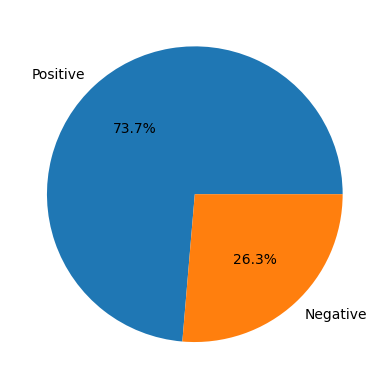

In [ ]:
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show

In [ ]:
#charcter count
#word count
#mean word length
#mean sentence length

In [ ]:
length = len(data['Review'][0])

In [ ]:
length

593

In [ ]:
words = data['Review'][0].split()

In [ ]:
len(words)

87

In [ ]:
def word_count(review):
  review_list = review.split()
  return len(review_list)


In [ ]:
data['word_count'] = data['Review'].apply(word_count)

In [ ]:
data

,Review,Rating,word_count
0,nice hotel expensive parking got good deal sta...,Positive,87
1,ok nothing special charge diamond member hilto...,Negative,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,217
3,"unique, great stay, wonderful time hotel monac...",Positive,89
4,"great stay great stay, went seahawk game aweso...",Positive,191
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Positive,109
20487,great location price view hotel great quick pl...,Positive,39
20488,"ok just looks nice modern outside, desk staff ...",Negative,63
20489,hotel theft ruined vacation hotel opened sept ...,Negative,781


In [ ]:
#discord bot 

In [ ]:
#chatbot 

In [ ]:
#coversational chatbot (GenarativeAI)

In [ ]:
#BLEU
#NIST
#meteor
#rouge
#CIDEr
#bert
#bertscore




In [ ]:
!python -m spacy download en_core_web_lg

2023-05-03 00:30:38.601410: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 00:30:40.008096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import en_core_web_lg
import numpy as numpy
import re
import spacy
from collections import defaultdict 
from sklearn.svm import SVC

In [ ]:
output_format = "IN: {input}\nOUT: {output}\n" + "_"*50

In [ ]:
#exact-match


responses = {
    "What would you like to eat?": "Pasta",
    "what's the time?": "9:00"
}

In [ ]:
def response(text):
  response = responses.get(text.lower(), responses['What would you like to eat?'])
  return(output_format.format(input=text, output=response))

In [ ]:
print(response("what would you like to eat?"))
print('_'*50)

IN: what would you like to eat?
OUTL Pasta
__________________________________________________
__________________________________________________


In [ ]:
#pattern matching 

intent_keywords = {'prefrence': ['eat', 'dinner', 'food', 'cook'],
                   'time': ['time', 'night', 'day']}

In [ ]:
patterns = {intent: re.compile('|'.join(keys)) for intent, keys in intent_keywords.items()}

In [ ]:
def get_intent_re(message):
  for intent, pattern in patterns.items():
    if pattern.search(message):
      return (intent)
    else:
      return('default')

In [ ]:
responses = {'prefrence':'pasta with salmon',
             'time': 'At 6 pm'}

In [ ]:
def response_re(text):
  response = responses.get(get_intent_re(text))
  return(output_format.format(input=text, output=response))

In [ ]:
print(response_re("what would you like to eat?"))

IN: what would you like to eat?
OUTL pasta with salmon
__________________________________________________


In [ ]:
#machine learning 


training_data = ['what would you like to eat?',
                 'what do you want tonight?',
                 'what time can i get?']
training_intents=['preference', 'preference', 'time']

In [ ]:
nlp = en_core_web_lg.load()

In [ ]:
import numpy as np

x_train = np.zeros((len(training_data), nlp('sentences').vocab.vectors_length))

In [ ]:
for i, sentence in enumerate(training_data):
  doc = nlp(sentence)
  x_train[i, :] = doc.vector

In [ ]:
#SVC

In [ ]:
clf = SVC(C = 1, gamma ='auto', probability=True)

In [ ]:
clf.fit(x_train, training_intents)

SVC(C=1, gamma='auto', probability=True)

In [ ]:
def get_intent_ml(text):
  doc = nlp(text)
  return(clf.predict([doc.vector])[0])

In [ ]:
def response_ml(text):
  response = responses.get(get_intent_ml(text))
  return(output_format.format(input=text, output=response))

In [ ]:
response_ml('what would you like to eat?')

'IN: what would you like to eat?\nOUTL None\n__________________________________________________'

In [ ]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/shorttextmimic.csv')

In [ ]:
df['SHORT-TEXT'].iloc[0]

'history of present illness f w poorly controlled type diabetes mellitus w neuropathy nephropathy htn gastroparesis ckd and retinopathy recently hospitalized for orthostatic hypotension autonomic neuropathy date range dka hospitalizations in and now returning w d history of worsening nausea vomiting with coffee ground emesis chills and dyspnea on exertion last week she had a fall and hit her right face she also had day of diarrhea which resolved early last week found to be in dka with ag and bicarb in the ed inital vitals were ra k hco anion gap cr baseline she is on her rd l ns insulin srip at units hr on home at levemir in am and at with difficult to control sugars bps have been high given mtroprolol tartrate in ed she was started on an insulin drip at units hr and l ns boluses also aspirin mg po and morphine mg ivx for pain cxr was clear ekg nad review of systems otherwise negative past medical historypertinent results admission labs am wbc rbc hgb hct mcv plt count lipase alt sgpt 

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scispacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scispacy-0.5.2-py3-none-any.whl (45 kB)
  Using cached nmslib-2.1.1-cp310-cp310-linux_x86_64.whl
  Using cached pysbd-0.3.4-py3-none-any.whl (71 kB)
  Using cached conllu-4.5.2-py2.py3-none-any.whl (16 kB)
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.1-py3-none-any.whl size=120217648 sha256=5c0881d32b851d6506296e0ef945847edc808153a2d639bca85f95bbbcc59001
  Stored in directory: /root/.cache/pip/wheels/89/bf/71/af9266a822964b06d994e4cd80dd9300018b20027b8ae5ae14
Successfully built en-ner-bc5cdr-md
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
ERROR: pip's 

In [ ]:
import scispacy 
import spacy 
nlp = spacy.load('en_ner_bc5cdr_md')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
def entities(row):
  x = str(row['SHORT-TEXT'])
  doc = nlp(x)
  diseases = []
  chemical = []
  for ent in doc.ents:
    if ent.label_ == 'DISEASE':
      diseases.append(ent.text)
    # if ent.label_ == 'CHEMICAL':
    #   chemical.append(ent.text)

  return diseases

In [ ]:
df

,HADM_ID,SHORT-TEXT,ICD9_CODE
0,100001,history of present illness f w poorly controll...,"25013, 3371, 5849, 5780, V5867, 25063, 5363, 4..."
1,100003,history of present illness mr known lastname i...,"53100, 2851, 07054, 5715, 45621, 53789, 4019, ..."
2,100007,history of present illness ms known lastname i...,"56081, 5570, 9973, 486, 4019"
3,100009,history of present illness yo man with known c...,"41401, 99604, 4142, 25000, 27800, V8535, 4148,..."
4,100010,history of present illness y o female w large ...,"1890, 1961, 1987, 1976, 27652"


In [ ]:
df['entities'] = df.apply(lambda row: entities(row), axis=1)

<ipython-input-105-22cf24c7d411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entities'] = df.apply(lambda row: entities(row), axis=1)


In [ ]:
df['entities'].iloc[1]

['gastropathy',
 'emesis',
 'nausea',
 'emesis',
 'tarry',
 'lightheadedness',
 'abdominal pain fever chills',
 'pain',
 'variceal bleed',
 'infection',
 'ascites',
 'tarry',
 'emesis',
 'aortic stenosis',
 'aortic regurgitation',
 'mitral regurgitation',
 'hypertension',
 'effusion',
 'mitral regurgitation',
 'pulmonary artery systolic hypertension',
 'varices',
 'esophagus erythema',
 'erosion',
 'gastritis bleeding',
 'pyloric ulcer',
 'ulcer',
 'pericardial effusion cyst and enlarged right atrium',
 'cardiac tamponade pulmonary vasculature',
 'pleural effusion',
 'pneumothorax',
 'pleural effusion',
 'portal venous thrombosis portal vein flow',
 'ascites',
 'perihepatic ascites',
 'cirrhosis splenomegaly',
 'cirrhosis',
 'varices',
 'emesis',
 'melena',
 'hypotension',
 'bleeds',
 'erythema',
 'gastritis',
 'backache',
 'pain',
 'hypotension',
 'cirrhosis',
 'liver failure',
 'chronic le edema',
 'peptic ulcer gi bleed']

In [ ]:
#10 marks presentation


#15 marks documentation


#25 marks programs

